In [9]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

## read dataset

In [2]:
df = pd.read_csv('datatset/implicit-hate-corpus/implicit_hate_v1_stg1_posts.tsv', sep='\t')
df.head(3)

,post,class
0,""" : jewish harvard professor noel ignatiev w...",implicit_hate
1,b.higher education is a part of european cult...,not_hate
2,"has a problem with "" the whites "" "" and "" "" ...",not_hate


In [16]:
df.shape

(21480, 2)

In [3]:
print(df['class'].value_counts())
df['class'] = df['class'].replace('implicit_hate', 'hate')
df['class'] = df['class'].replace('explicit_hate', 'hate')
print(df['class'].value_counts())

X = df['post']
y = df['class']
classes = list(df['class'].unique())

not_hate         13291
implicit_hate     7100
explicit_hate     1089
Name: class, dtype: int64
not_hate    13291
hate         8189
Name: class, dtype: int64


## Binary Classification (baseline)

In [4]:
# Load pre-trained BERT model
model_name = 'bert-base-nli-mean-tokens'
model = SentenceTransformer(model_name)

# Encode text using pre-trained BERT model
encoded_text = model.encode(X.tolist())

In [7]:
X_train, X_test, y_train, y_test = train_test_split(encoded_text, df['class'], test_size=0.2, random_state=42)

Accuracy: 0.7274208566108007 

              precision    recall  f1-score   support

        hate       0.66      0.58      0.62      1622
    not_hate       0.76      0.82      0.79      2674

    accuracy                           0.73      4296
   macro avg       0.71      0.70      0.70      4296
weighted avg       0.72      0.73      0.72      4296



<AxesSubplot:>

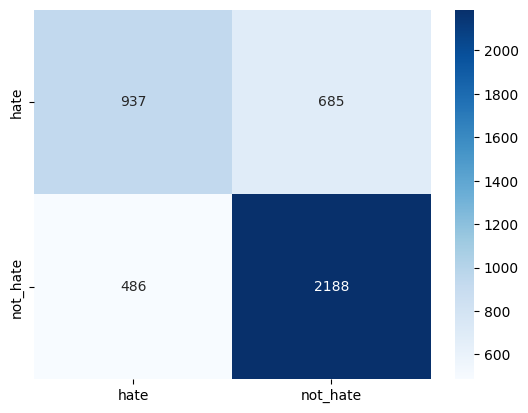

In [10]:
# Define MLP classifier with 6 output classes
classifier = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=1000)

# Train the classifier on the encoded text
classifier.fit(X_train, y_train)

# Predict the labels for the encoded text
y_pred = classifier.predict(X_test)

# Calculate accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy} \n")

# Calculate classification report and confusion matrix
target_names = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6']
print(classification_report(y_test, y_pred, target_names=classes))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes, fmt='d')

## Binary Classification (baseline + BK)

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
def extract_background_knowledge(tweet_text):
    # Tokenize the tweet text
    tokens = word_tokenize(tweet_text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Extract background knowledge from tokens
    background_knowledge = set()
    for token in tokens:
        if len(token) > 3:
            background_knowledge.add(token)

    background_knowledge = list(background_knowledge)
    return ' '.join(background_knowledge)

In [13]:
text_with_BK = [x + extract_background_knowledge(x) for x in X]

# Load pre-trained BERT model
model_name = 'bert-base-nli-mean-tokens'
model = SentenceTransformer(model_name)

# Encode text using pre-trained BERT model
encoded_text = model.encode(text_with_BK)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(encoded_text, df['class'], test_size=0.2, random_state=42)

Accuracy: 0.7232309124767226 

              precision    recall  f1-score   support

        hate       0.66      0.55      0.60      1622
    not_hate       0.75      0.83      0.79      2674

    accuracy                           0.72      4296
   macro avg       0.71      0.69      0.69      4296
weighted avg       0.72      0.72      0.72      4296



<AxesSubplot:>

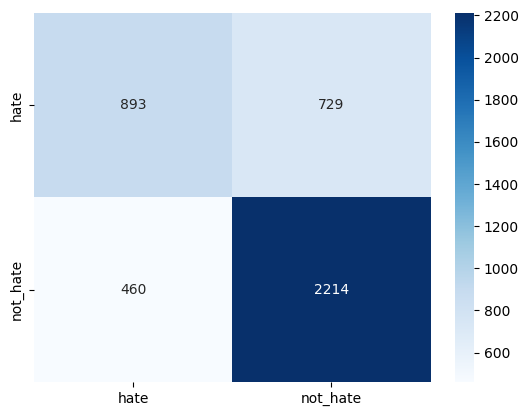

In [15]:
# Define MLP classifier with 6 output classes
classifier = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=1000)

# Train the classifier on the encoded text
classifier.fit(X_train, y_train)

# Predict the labels for the encoded text
y_pred = classifier.predict(X_test)

# Calculate accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy} \n")

# Calculate classification report and confusion matrix
target_names = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6']
print(classification_report(y_test, y_pred, target_names=classes))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes, fmt='d')